<h1 align="center"><b>CS116.M11 - LẬP TRÌNH PYTHON CHO MÁY HỌC</b></h1>
<h1 align="center"><b>BÀI TẬP 2 - NGÀY 21/09/2021</b></h1>

# **Thông tin sinh viên**

1. ***MSSV:*** 19520214
2. ***Họ tên:*** Cao Hưng Phú
3. ***Bài tập:*** Bài tập 2.2
4. ***Ngày thực hiện:*** 21/09/2021

# **Bài làm**

## **1. Cài thư viện geopandas**

In [3]:
!pip install geopandas

In [4]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

## **2. Clone data**

In [5]:
!git clone https://github.com/CityScope/CSL_HCMC.git

fatal: destination path 'CSL_HCMC' already exists and is not an empty directory.


## **3. Gán path và đọc file data bằng geopandas**

In [6]:
path_data = "/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile"

In [7]:
path_read_data = path_data + "/Population_District_Level.shp"

In [8]:
data = gpd.read_file(path_read_data)

## **4. Vẽ ranh giới các quận lên bản đồ**

### **4.1. Vẽ bằng mathplotlib**

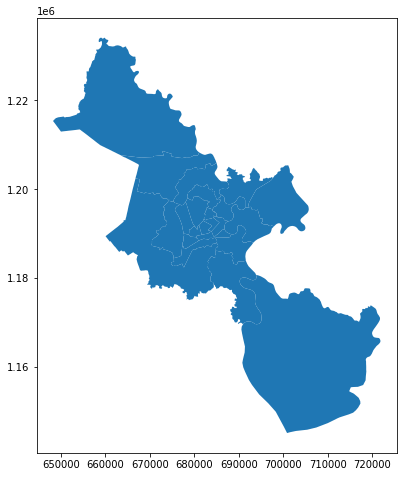

In [9]:
data.plot(figsize=(8, 8))
plt.show()

### **4.2. Vẽ lên map**

In [12]:
m = folium.Map(location=[11.2, 107], zoom_start=10, tiles='CartoDB positron')
for _, r in data.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)


# Project to NAD83 projected crs
data = data.to_crs(epsg=2263)

# Access the centroid attribute of each polygon
data['centroid'] = data.centroid

# Project to NAD83 projected crs
data = data.to_crs(epsg=4326)

# Access the centroid attribute of each polygon
data['centroid'] = data.centroid


for _, r in data.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon],
                  popup='length: {} <br> area: {}'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)

m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

